In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from helper import plot_boundary
from prettytable import PrettyTable
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 20)
plt.rcParams["figure.figsize"] = (12,8)


In [8]:
# Read the data file "election_train.csv" as a Pandas dataframe
elect_train = pd.read_csv("election_train.csv")

# Read the data file "election_test.csv" as a Pandas dataframe
elect_test = pd.read_csv("election_test.csv")

# Take a quick look at the train data
elect_train.head()


In [10]:
### edTest(test_data) ###
# Import libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define predictors and response for training and testing
X_train = elect_train[['minority', 'bachelor']]
X_test = elect_test[['minority', 'bachelor']]
y_train = elect_train['won']
y_test = elect_test['won']

# Initialize the decision tree classifier
d = DecisionTreeClassifier(max_depth=2)

# Train the classifier
d.fit(X_train, y_train)

# Predict on the test dataset
y_pred = d.predict(X_test)


In [11]:
### edTest(test_models) ###

# Initialize a Decision Tree classifier with a depth of 2
dt1 = DecisionTreeClassifier(max_depth=2)

# Fit the classifier on the train data
dt1.fit(X_train, y_train)

# Initialize a Decision Tree classifier with a depth of 10
dt2 = DecisionTreeClassifier(max_depth=10)

# Fit the classifier on the train data
dt2.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=10)

/usr/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


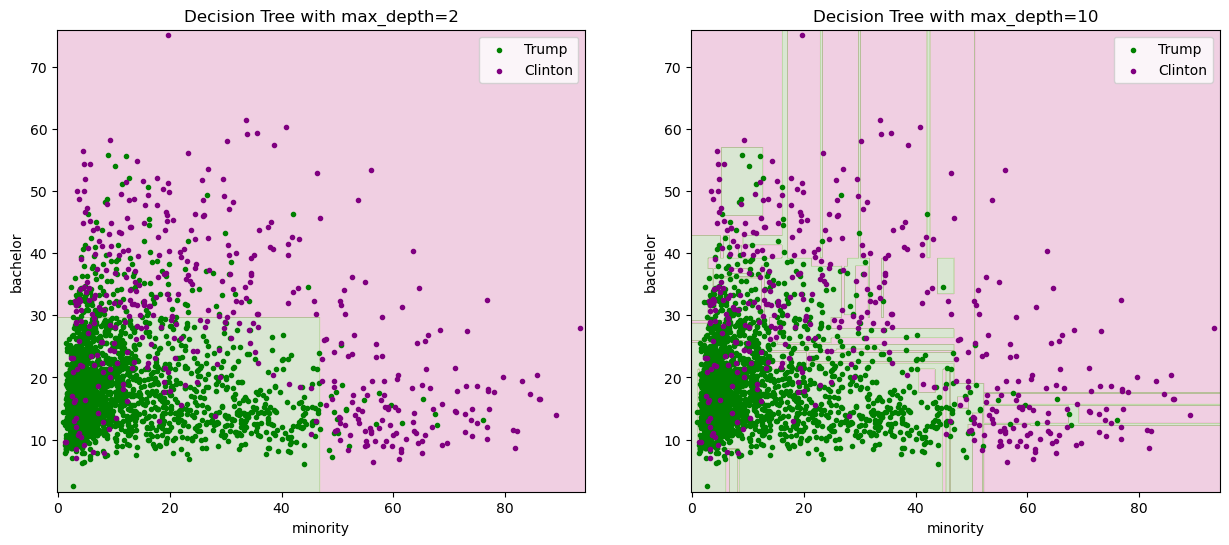

In [12]:
# Call the function plot_boundary from the helper file to get 
# the decision boundaries of both the classifiers
plot_boundary(elect_train, dt1, dt2)


In [13]:
# Set of predictor columns
pred_cols = ['minority', 'density', 'hispanic', 'obesity', 'female', 'income', 'bachelor', 'inactivity']

# Use the columns above as the features to get the predictor set from the train data
X_train = elect_train[pred_cols]

# Use the columns above as the features to get the predictor set from the test data
X_test = elect_test[pred_cols]

# Initialize a Decision Tree classifier with a depth of 2
dt1 = DecisionTreeClassifier(max_depth=2)

# Initialize a Decision Tree classifier with a depth of 10
dt2 = DecisionTreeClassifier(max_depth=10)

# Initialize a Decision Tree classifier with a depth of 15
dt3 = DecisionTreeClassifier(max_depth=15)

# Fit all the classifiers on the train data
dt1.fit(X_train, y_train)
dt2.fit(X_train, y_train)
dt3.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=15)

In [14]:
### edTest(test_accuracy) ###

# Compute the train and test accuracy for the first decision tree classifier of depth 2
dt1_train_acc = dt1.score(X_train, y_train)
dt1_test_acc = dt1.score(X_test, y_test)

# Compute the train and test accuracy for the second decision tree classifier of depth 10
dt2_train_acc = dt2.score(X_train, y_train)
dt2_test_acc = dt2.score(X_test, y_test)

# Compute the train and test accuracy for the third decision tree classifier of depth 15
dt3_train_acc = dt3.score(X_train, y_train)
dt3_test_acc = dt3.score(X_test, y_test)


In [15]:
# Helper code to plot the scores of each classifier as a table
pt = PrettyTable()
pt.field_names = ['Max Depth', 'Number of Features', 'Train Accuracy', 'Test Accuracy']
pt.add_row([2, len(pred_cols), round(dt1_train_acc, 4), round(dt1_test_acc,4)])
pt.add_row([10, len(pred_cols), round(dt2_train_acc,4), round(dt2_test_acc,4)])
pt.add_row([15, len(pred_cols), round(dt3_train_acc,4), round(dt3_test_acc,4)])
print(pt)


+-----------+--------------------+----------------+---------------+
| Max Depth | Number of Features | Train Accuracy | Test Accuracy |
+-----------+--------------------+----------------+---------------+
|     2     |         8          |     0.8924     |     0.8862    |
|     10    |         8          |     0.9863     |     0.9167    |
|     15    |         8          |     0.9996     |     0.9024    |
+-----------+--------------------+----------------+---------------+
